# **Destino de proceso**

Azure Machine Learning admite varios tipos de proceso para la experimentación, el entrenamiento y la implementación. Al tener varios tipos de proceso, puedes seleccionar el tipo de destino de proceso más adecuado para tus necesidades concretas.

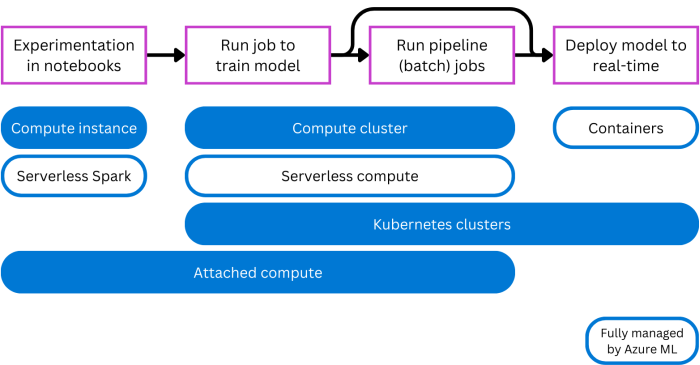

- **Instancia de proceso**: se comporta de forma similar a una máquina virtual y se usa principalmente para ejecutar cuadernos. Es idóneo para la experimentación.
- **Clústeres de proceso**: clústeres de varios nodos de máquinas virtuales que se escalan o reducen verticalmente de forma automática para satisfacer la demanda. Una manera rentable de ejecutar scripts que necesitan procesar grandes volúmenes de datos. Los clústeres también permiten usar el procesamiento paralelo para distribuir la carga de trabajo y reducir el tiempo necesario para ejecutar un script.
- **Clústeres de Kubernetes**: clúster basado en la tecnología Kubernetes, que proporciona más control sobre cómo se configura y administra el proceso. Puede asociar el clúster de Azure Kubernetes (AKS) autoadministrado para el proceso en la nube, o bien un clúster Arc de Kubernetes para cargas de trabajo locales.
- **Proceso adjunto**: Permite asociar un proceso existente como máquinas virtuales de Azure o clústeres de Azure Databricks al área de trabajo.
- **Proceso sin servidor**: Un proceso totalmente administrado a petición que puede usar para los trabajos de entrenamiento.

## **Casos de Uso para Destinos de Proceso en Azure Machine Learning**

### **1. Elección de un Destino de Proceso para la Experimentación**
- **Escenario:**  
  Durante la fase de experimentación, los científicos de datos suelen trabajar con pequeños subconjuntos de datos y requieren flexibilidad para probar diferentes enfoques rápidamente.
  
- **Opciones Recomendadas:**
  - **Instancia de Proceso (Compute Instance):**  
    Ideal para experimentación en cuadernos Jupyter Notebook. Es una máquina virtual administrada por Azure que se ejecuta continuamente, permitiendo una experiencia fluida similar a trabajar localmente.
  - **Proceso sin Servidor de Spark:**  
    Si se necesita procesamiento distribuido o grandes volúmenes de datos durante la experimentación, puedes usar el proceso sin servidor de Spark para aprovechar la potencia de Apache Spark directamente en cuadernos.

- **Cuándo Usarlo:**  
  - Cuando se necesita una configuración rápida y fácil para experimentar con modelos.
  - Para trabajar en cuadernos interactivos con pequeños conjuntos de datos.

### **2. Elección de un Destino de Proceso para Producción**
- **Escenario:**  
  Una vez finalizada la experimentación, los scripts de entrenamiento deben automatizarse y escalarse para manejar grandes volúmenes de datos en producción.

- **Opciones Recomendadas:**
  - **Clúster de Proceso (Compute Cluster):**  
    Un clúster de proceso es ideal para ejecutar trabajos de entrenamiento a gran escala. Se escala automáticamente según la carga de trabajo y reduce los costos al apagarse cuando no está en uso.
  - **Proceso sin Servidor de Azure Machine Learning:**  
    Una alternativa administrada que elimina la necesidad de crear y gestionar clústeres manualmente, ideal para usuarios que prefieren una solución completamente administrada.

- **Cuándo Usarlo:**  
  - Cuando se necesita escalabilidad para manejar grandes volúmenes de datos.
  - Para automatizar y programar trabajos de entrenamiento recurrentes.

### **3. Elección de un Destino de Proceso para el Despliegue**
- **Escenario:**  
  Después de entrenar un modelo, se necesita implementarlo para generar predicciones. El tipo de despliegue depende de si las predicciones serán por lotes o en tiempo real.

#### **3.1. Predicciones por Lotes**
- **Opciones Recomendadas:**
  - **Clúster de Proceso:**  
    Ideal para ejecutar trabajos de canalización que procesan grandes volúmenes de datos en lotes.
  - **Proceso sin Servidor de Azure Machine Learning:**  
    Una alternativa escalable y administrada para ejecutar trabajos de predicción por lotes sin necesidad de gestionar infraestructura.

- **Cuándo Usarlo:**  
  - Cuando se necesita procesar grandes volúmenes de datos en segundo plano sin interacción en tiempo real.

#### **3.2. Predicciones en Tiempo Real**
- **Opciones Recomendadas:**
  - **Puntos de Conexión en Línea Administrados:**  
    Azure ML crea y administra contenedores ligeros para implementar modelos como servicios RESTful, lo que permite predicciones en tiempo real con bajo costo.
  - **Azure Kubernetes Service (AKS):**  
    Ideal para implementaciones en tiempo real que requieren alta disponibilidad, escalabilidad y control total sobre el entorno de despliegue.

- **Cuándo Usarlo:**  
  - Para aplicaciones que requieren respuestas en tiempo real, como recomendaciones personalizadas o detección de fraudes.
  - Cuando se necesita un despliegue escalable y robusto.

## **Creación y uso de una instancia de cómputo**

In [ ]:
from azure.ai.ml.entities import ComputeInstance

ci_basic_name = "basic-ci-12345"
ci_basic = ComputeInstance(
    name=ci_basic_name, 
    size="STANDARD_DS3_v2"
)
ml_client.begin_create_or_update(ci_basic).result()

## **Creación y uso de un clúster de proceso**

Después de la experimentación y el desarrollo, se quiere que el código esté listo para producción. 
- Al ejecutar código en entornos de producción, es mejor usar scripts en lugar de cuadernos. 
- Al ejecutar un script, querrá usar un destino de proceso que sea escalable.

En Azure Machine Learning, los clústeres de proceso son idóneos para ejecutar scripts. 
- Se puede crear un clúster de proceso en Estudio de Azure Machine Learning, mediante la interfaz de la línea de comandos (CLI) de Azure o el kit de desarrollo de software (SDK) de Python.


Al crear un clúster de proceso, hay tres parámetros principales que debe tener en cuenta:

- **size**: especifica el tipo de máquina virtual de cada nodo dentro del clúster de proceso. Se basa en los tamaños de las máquinas virtuales en Azure. Junto al tamaño, también puede especificar si quiere usar CPU o GPU.
- **max_instances**: especifica el número máximo de nodos a los que el clúster de proceso puede escalar horizontalmente. El número de cargas de trabajo paralelas que puede controlar el clúster de proceso es análogo al número de nodos a los que puede escalar el clúster.
- **tier**: Especifica si las máquinas virtuales serán de prioridad baja o dedicadas. El establecimiento de una prioridad baja puede reducir los costos, ya que la disponibilidad no está garantizada.

In [ ]:
from azure.ai.ml.entities import AmlCompute

cluster_basic = AmlCompute(
    name="cpu-cluster",
    type="amlcompute",
    size="STANDARD_DS3_v2",
    location="westus",
    min_instances=0,
    max_instances=2,
    idle_time_before_scale_down=120,
    tier="low_priority",
)
ml_client.begin_create_or_update(cluster_basic).result()

### **Uso de un clúster de proceso**
Hay tres escenarios principales en los que puede usar un clúster de proceso:

- Ejecutar un job de pipeline que ha compilado en el Diseñador.
- Ejecutar un job de aprendizaje automático automatizado.
- Ejecutar un script como job.

Por ejemplo, para ejecutar un script como un job de comando, se puede establecer el destino de proceso en el clúster:

In [ ]:
from azure.ai.ml import command

# configure job
job = command(
    code="./src",
    command="python diabetes-training.py",
    environment="AzureML-sklearn-0.24-ubuntu18.04-py37-cpu@latest",
    compute="cpu-cluster",
    display_name="train-with-cluster",
    experiment_name="diabetes-training"
    )

# submit job
returned_job = ml_client.create_or_update(job)
aml_url = returned_job.studio_url
print("Monitor your job at", aml_url)

Después de enviar un trabajo que usa un clúster de proceso, el clúster de proceso se escalará horizontalmente a uno o varios nodos. 
- El cambio de tamaño tardará unos minutos y el trabajo comenzará a ejecutarse una vez que se aprovisionen los nodos necesarios. 
- Cuando el estado de un trabajo es en preparación, significa que el clúster de proceso se está preparando. 
- Cuando el estado es en ejecución, el clúster de proceso está listo y el trabajo se está ejecutando.